# Loading the Data and EDA

In [49]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('train_classification_project3.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [3]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual

In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
df.corr().abs()['Sale Condition'].sort_values(ascending=False)

KeyError: 'Sale Condition'

In [7]:
df['Sale Condition'] = (df['Sale Condition'] == 'Abnorml').astype(int)
df[['Sale Condition']].head()

,Sale Condition
0,0
1,0
2,1
3,0
4,0


In [8]:
df['Sale Condition'].value_counts()

0    1919
1     132
Name: Sale Condition, dtype: int64

# Feature Selection

In [22]:
# Year Remod/Add, SalePrice, Overall Qual, Year Built, Garage Cars, Garage Yr Blt, Garage Area
# 'Overall Qual','1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF'
X = df[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].values
y = df['Sale Condition'].values

In [23]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
Imputed = imp.transform(X)
imputed_df = pd.DataFrame(Imputed)
imputed_df.head()

,0,1,2,3,4,5
0,2005.0,6.0,1976.0,2.0,1976.0,475.0
1,1997.0,7.0,1996.0,2.0,1997.0,559.0
2,2007.0,5.0,1953.0,1.0,1953.0,246.0
3,2007.0,5.0,2006.0,2.0,2007.0,400.0
4,1993.0,6.0,1900.0,2.0,1957.0,484.0


In [24]:
df[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']] = imputed_df.iloc[:, :]

In [25]:
X = df[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].values
y = df['Sale Condition'].values

In [26]:
df[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].isnull().sum()

Year Remod/Add    0
Overall Qual      0
Year Built        0
Garage Cars       0
Garage Yr Blt     0
Garage Area       0
dtype: int64

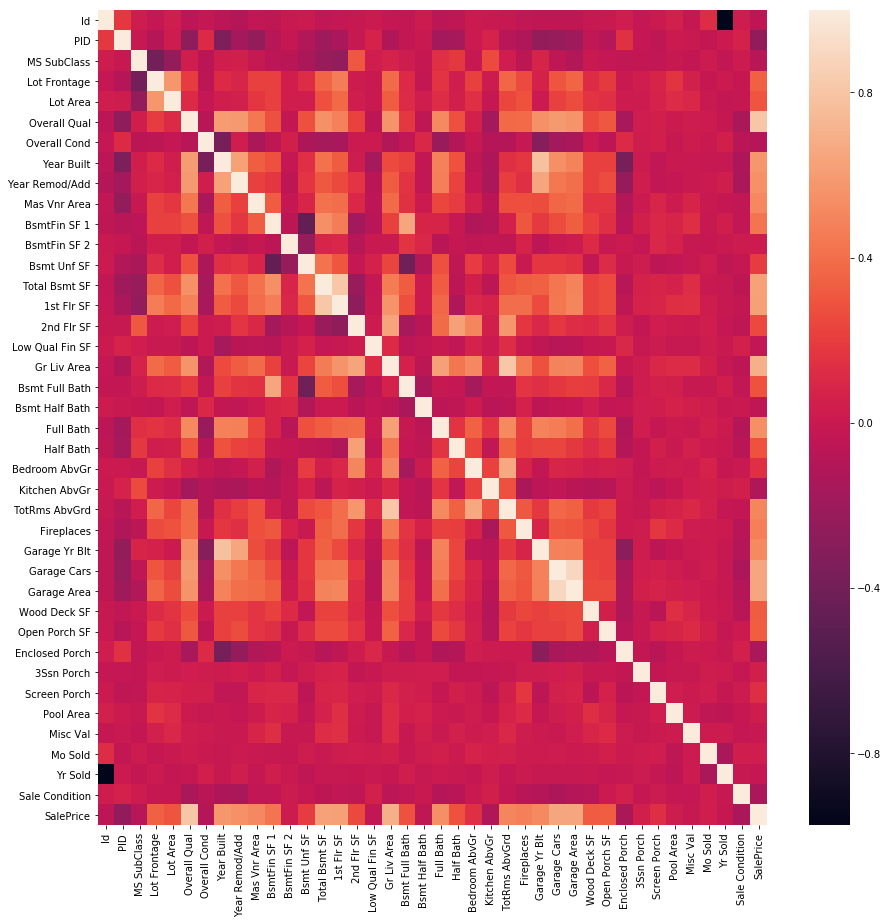

In [27]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [28]:
ss = StandardScaler()
ss.fit(X)
X_standard = ss.transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33)

In [77]:
grdboost = GradientBoostingClassifier()
grdboost_params = {'n_estimators': [75, 100, 125, 150],
                   'max_depth': range(2, 5),
                  'max_features': ['auto', 'log2', None],
                  'min_samples_split': [2,3,4]}
grdboost_model = GridSearchCV(grdboost, grdboost_params, scoring='recall')
grdboost_model.fit(X_train, y_train)
print('best score', grdboost_model.best_score_)
print('best params', grdboost_model.best_params_)
print('test score', grdboost_model.score(X_test, y_test))

best score 0.0743055066441
best params {'max_depth': 4, 'max_features': None, 'min_samples_split': 3, 'n_estimators': 75}
test score 0.0789473684211


In [90]:
rfregr = RandomForestClassifier()
rfregr_params = {'n_estimators': [50, 75, 100, 125],
                'criterion': ['gini', 'entropy'],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'max_depth': range(8, 11),}
rfregr_model = GridSearchCV(rfregr, rfregr_params)
rfregr_model.fit(X_train, y_train)
print('best score', rfregr_model.best_score_)
print('best params', rfregr_model.best_params_)
print('test score', rfregr_model.score(X_test, y_test))

best score 0.930858806405
best params {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}
test score 0.942392909897


In [78]:
best_grd = grdboost_model.best_estimator_
best_grd

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=75,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [62]:
best_rfclass = rfregr_model.best_estimator_
best_rfclass

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
df2 = pd.read_csv('test_project3.csv')
df2.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [80]:
Xtest = df2[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].values

In [81]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df2[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].values)
Imputed_test = imp.transform(df2[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].values)
imputed_df2 = pd.DataFrame(Imputed_test)
imputed_df2.head()

,0,1,2,3,4,5
0,1950.0,6.0,1910.0,1.0,1910.0,440.0
1,1977.0,5.0,1977.0,2.0,1977.0,580.0
2,2006.0,7.0,2006.0,2.0,2006.0,426.0
3,2006.0,5.0,1923.0,2.0,1935.0,480.0
4,1963.0,6.0,1963.0,2.0,1963.0,514.0


In [82]:
df2[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']] = imputed_df2.iloc[:, :]

In [83]:
Xtest = df2[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].values
Xtest

array([[  1.95000000e+03,   6.00000000e+00,   1.91000000e+03,
          1.00000000e+00,   1.91000000e+03,   4.40000000e+02],
       [  1.97700000e+03,   5.00000000e+00,   1.97700000e+03,
          2.00000000e+00,   1.97700000e+03,   5.80000000e+02],
       [  2.00600000e+03,   7.00000000e+00,   2.00600000e+03,
          2.00000000e+00,   2.00600000e+03,   4.26000000e+02],
       ..., 
       [  1.96800000e+03,   5.00000000e+00,   1.96800000e+03,
          1.00000000e+00,   1.96800000e+03,   3.22000000e+02],
       [  1.97100000e+03,   4.00000000e+00,   1.97100000e+03,
          2.00000000e+00,   1.97400000e+03,   5.28000000e+02],
       [  1.95500000e+03,   5.00000000e+00,   1.95500000e+03,
          1.00000000e+00,   1.95500000e+03,   3.90000000e+02]])

In [84]:
df2[['Year Remod/Add', 'Overall Qual', 'Year Built', 'Garage Cars', 'Garage Yr Blt', 'Garage Area']].isnull().sum()

Year Remod/Add    0
Overall Qual      0
Year Built        0
Garage Cars       0
Garage Yr Blt     0
Garage Area       0
dtype: int64

In [85]:
ss = StandardScaler()
X_test_standard = ss.fit_transform(Xtest)

In [86]:
grd_class_id = df2[['Id']]
grd_class_id.shape

(879, 1)

In [87]:
gradbclass_predictions = pd.DataFrame(best_grd.predict(X_test_standard), columns = ['Sale Condition'])
gradbclass_predictions.shape

(879, 1)

In [88]:
gradbclass_submission = pd.concat([grd_class_id, gradbclass_predictions], axis=1)
gradbclass_submission.shape

(879, 2)

In [89]:
gradbclass_submission.to_csv('GradientBoosting_Predictions_Classification2.csv', index=False)